In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [15]:
X, y = load_breast_cancer(return_X_y=True)
print(X.shape, y.shape)

(569, 30) (569,)


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
print("KNN: ",classifier.score(X_test,Y_test))

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
print("SVM: ",classifier.score(X_test,Y_test))

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
print("Naive Bayes: ",classifier.score(X_test,Y_test))

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
print("Decision Tree: ",classifier.score(X_test,Y_test))

KNN:  0.951048951048951
SVM:  0.986013986013986
Naive Bayes:  0.972027972027972
Decision Tree:  0.9370629370629371


In [18]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [19]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_s, Y_train)

print("KNN: ",classifier.score(X_test_s,Y_test))

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_s, Y_train)

print("SVM: ",classifier.score(X_test_s,Y_test))

classifier = GaussianNB()
classifier.fit(X_train_s, Y_train)

print("Naive Bayes: ",classifier.score(X_test_s,Y_test))

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_s, Y_train)

print("Decision Tree: ",classifier.score(X_test_s,Y_test))

KNN:  0.9790209790209791
SVM:  0.993006993006993
Naive Bayes:  0.972027972027972
Decision Tree:  0.9370629370629371


# Clustering 

In [20]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

In [21]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [22]:
from sklearn.preprocessing import scale
data = scale(digits.data)

In [23]:
n_samples, n_features = data.shape
data.shape

(1797, 64)

In [24]:
n_digits = len(np.unique(digits.target))
labels = digits.target

In [25]:
model = KMeans(init='random', n_clusters=n_digits, n_init=10)

In [26]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## PCA 

In [27]:
reduced_data = PCA(n_components=2).fit_transform(data)
model2 = KMeans(init='random', n_clusters=n_digits, n_init=10)
model2.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

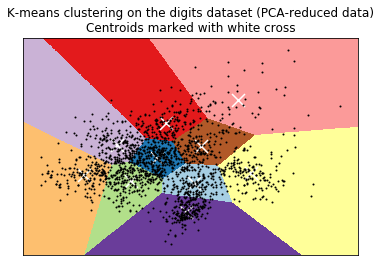

In [36]:
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = model2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w')
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()